In [14]:
import numpy as np # algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualozation
import seaborn as sns # stats data visualization
%matplotlib inline
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv('traffic_data_adwords_position.csv') 

In [17]:
df.head() # top rows

,Title,Keyword,Keyword ID,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty,Last Seen
0,PMP® Exam & Certification | Flat 40% Off - Enr...,pmp certification,1,1,1,90500,3.76,4253,22.77,15991,24.66,0.60,166000000,78.0,12/31/2024
1,PMP® Exam & Certification | Confidently Ace Th...,pmp certification,1,1,1,90500,3.76,4253,22.77,15991,24.66,0.60,172000000,78.0,1/1/2025
2,PMP® Training & Exam | Special Offer: Get $400...,pmp certification,1,1,2,90500,3.82,1176,6.29,4492,6.92,0.65,154000000,77.0,1/14/2025
3,CSM Scrum Master Course Online | Today's Offer...,scrum master certification,2,1,1,18100,3.21,850,4.55,2728,4.20,0.64,32000000,70.0,1/10/2025
4,PMP® Certification | Ace PMP Exam in 1st Attempt,pmp certification,1,3,3,90500,3.82,814,4.35,3109,4.79,0.65,165000000,78.0,1/7/2025


In [18]:
df.info() #data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               199 non-null    object 
 1   Keyword             199 non-null    object 
 2   Keyword ID          199 non-null    int64  
 3   Position            199 non-null    int64  
 4   Previous position   199 non-null    int64  
 5   Search Volume       199 non-null    int64  
 6   CPC                 199 non-null    float64
 7   Traffic             199 non-null    int64  
 8   Traffic (%)         199 non-null    float64
 9   Traffic Cost        199 non-null    int64  
 10  Traffic Cost (%)    199 non-null    float64
 11  Competition         199 non-null    float64
 12  Number of Results   199 non-null    int64  
 13  Keyword Difficulty  198 non-null    float64
 14  Last Seen           199 non-null    object 
dtypes: float64(5), int64(7), object(3)
memory usage: 23.4+ KB

In [19]:
df.describe() #stats info

,Keyword ID,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,198.000000
mean,3.281407,2.532663,2.391960,4711.608040,3.916985,93.829146,0.498945,325.819095,0.499347,0.381658,4.575325e+07,48.747475
std,2.287693,1.526761,1.559311,16003.015228,3.853916,446.718734,2.392012,1671.621365,2.578053,0.198629,1.462253e+08,16.954309
min,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000
25%,1.000000,1.000000,1.000000,70.000000,2.310000,0.500000,0.000000,0.000000,0.000000,0.185000,2.750000e+06,37.000000
50%,3.000000,2.000000,2.000000,170.000000,3.210000,3.000000,0.010000,7.000000,0.010000,0.410000,5.570000e+06,47.500000
75%,4.000000,4.000000,4.000000,1600.000000,4.485000,20.000000,0.100000,48.000000,0.070000,0.520000,3.170000e+07,60.000000
max,10.000000,6.000000,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,97.000000


In [20]:
df_1 = df[['Competition', 'Keyword Difficulty']] 
df_1.head() # top rows

,Competition,Keyword Difficulty
0,0.60,78.0
1,0.60,78.0
2,0.65,77.0
3,0.64,70.0
4,0.65,78.0


In [21]:
df_1.isna().sum() # checking for null values

Competition           0
Keyword Difficulty    1
dtype: int64

In [22]:
df_1.dropna() # droppong null values

,Competition,Keyword Difficulty
0,0.60,78.0
1,0.60,78.0
2,0.65,77.0
3,0.64,70.0
4,0.65,78.0
...,...,...
194,0.61,31.0
195,0.39,47.0
196,0.24,46.0
197,0.30,24.0


In [24]:
df_1 = df_1.dropna()

In [25]:
df_1.isna().sum() # null values dropped

Competition           0
Keyword Difficulty    0
dtype: int64

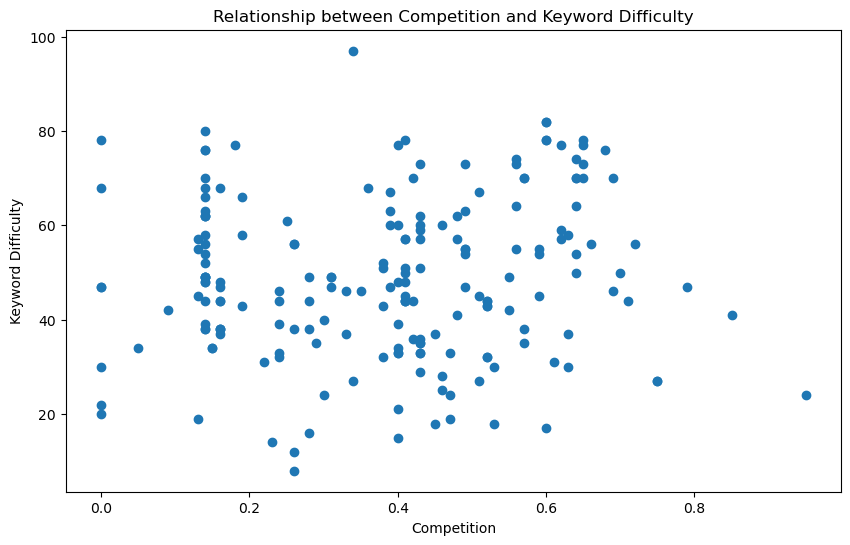

In [26]:
# correlation with scatter plot
plt.figure(figsize= (10,6))
plt.scatter(df_1['Competition'], df_1['Keyword Difficulty'])
plt.xlabel('Competition')
plt.ylabel('Keyword Difficulty')
plt.title('Relationship between Competition and Keyword Difficulty')
plt.show()

In [27]:
df_1_corr = df_1.corr()

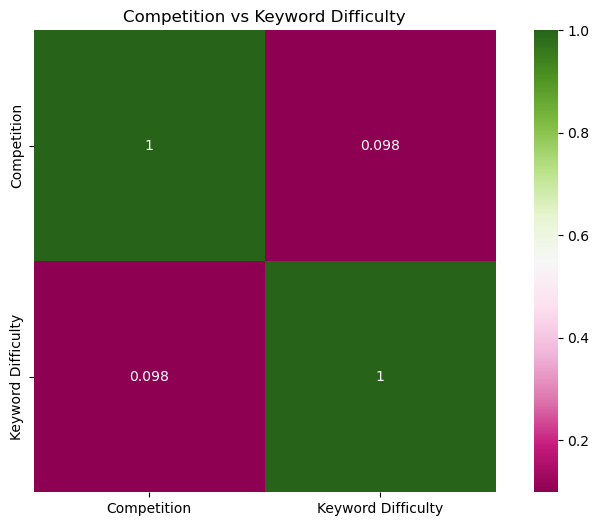

In [29]:
# correlation with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_1_corr, annot= True, cmap = 'PiYG',square=True)
plt.title('Competition vs Keyword Difficulty')
plt.show()

In [30]:
X = df_1 # stroung df in X
y = df_1['Keyword Difficulty']

### Elbow Method

In [31]:
# elbow method 
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

C:\Users\eFASTGHANA\anaconda3\envs\m_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\eFASTGHANA\anaconda3\envs\m_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import plotly as py
import plotly.graph_objs as go

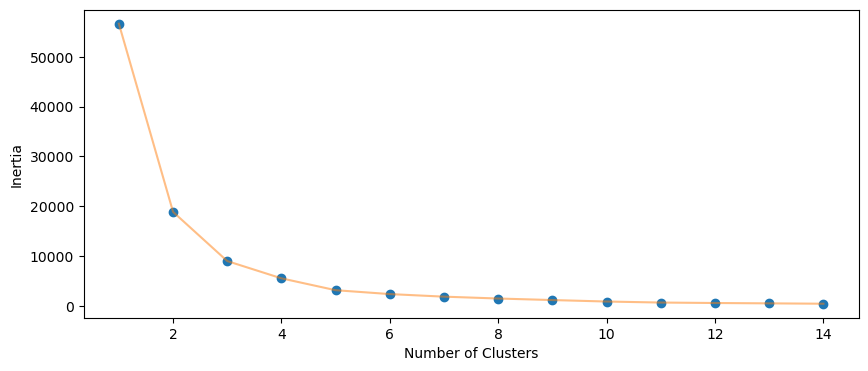

In [35]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [36]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [37]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [38]:
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

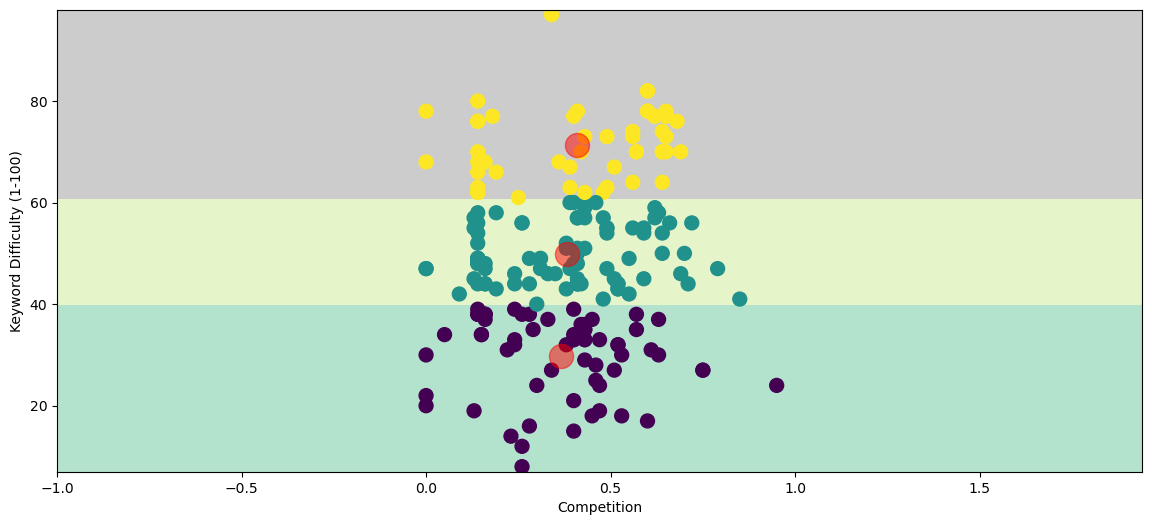

In [39]:
plt.figure(1 , figsize = (14 , 6) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Competition', y = 'Keyword Difficulty', data = df_1, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Keyword Difficulty (1-100)') , plt.xlabel('Competition')
plt.show()